In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [ ]:
data = pd.read_csv("Language Detection.csv")
print(f' Dataset: \n {data}')

 Dataset: 
                                                     Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]


In [ ]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
data.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [ ]:
data.describe

<bound method NDFrame.describe of                                                     Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]>

In [ ]:
data.shape

(10337, 2)

In [ ]:
data.isna()

,Text,Language
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10332,False,False
10333,False,False
10334,False,False
10335,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
#training and testing the
x = np.array(data["Text"])
y = np.array(data["Language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:
print(f"{X_train}")


  (0, 16086)	1
  (0, 1114)	1
  (1, 1603)	1
  (1, 2231)	1
  (1, 9329)	1
  (1, 12874)	1
  (1, 17080)	1
  (1, 7043)	1
  (1, 14776)	1
  (1, 17085)	1
  (1, 24068)	1
  (1, 18699)	1
  (1, 16610)	1
  (2, 24867)	1
  (2, 1603)	1
  (2, 22229)	1
  (2, 3946)	1
  (2, 12169)	1
  (2, 23873)	1
  (2, 11052)	1
  (2, 2969)	1
  (2, 24590)	1
  (2, 6148)	1
  (2, 5585)	1
  (2, 15126)	1
  :	:
  (6923, 13363)	1
  (6923, 1281)	1
  (6923, 17987)	1
  (6923, 24878)	3
  (6923, 7266)	1
  (6923, 1088)	1
  (6923, 10977)	1
  (6923, 10769)	1
  (6923, 22787)	1
  (6923, 24216)	1
  (6924, 18687)	3
  (6924, 27418)	2
  (6924, 16365)	2
  (6924, 1628)	1
  (6924, 13640)	1
  (6924, 847)	1
  (6924, 23198)	1
  (6924, 8967)	1
  (6924, 26282)	1
  (6924, 13233)	1
  (6924, 7351)	1
  (6924, 7364)	1
  (6924, 16367)	1
  (6924, 1972)	1
  (6924, 6461)	1


In [ ]:
print(X_test)

  (0, 30611)	1
  (0, 32278)	1
  (0, 31752)	1
  (0, 32020)	2
  (0, 30677)	1
  (0, 33149)	1
  (0, 32021)	1
  (0, 32377)	1
  (0, 30848)	1
  (0, 31709)	1
  (0, 31258)	2
  (0, 33896)	1
  (0, 33065)	1
  (0, 31260)	1
  (0, 32462)	1
  (0, 31517)	1
  (0, 33567)	1
  (0, 30180)	1
  (0, 30867)	1
  (0, 30439)	1
  (0, 30505)	1
  (0, 30481)	1
  (0, 32473)	1
  (0, 32785)	1
  (0, 30303)	1
  :	:
  (3410, 16112)	1
  (3410, 27212)	1
  (3410, 14723)	1
  (3410, 17365)	1
  (3410, 5690)	1
  (3410, 15873)	1
  (3410, 2225)	1
  (3410, 8103)	1
  (3410, 26027)	1
  (3410, 5585)	1
  (3410, 15292)	1
  (3410, 7373)	1
  (3410, 11958)	1
  (3410, 27360)	1
  (3410, 5696)	1
  (3410, 33)	1
  (3410, 9256)	1
  (3410, 534)	1
  (3410, 24217)	1
  (3410, 17278)	1
  (3410, 22050)	1
  (3410, 19305)	1
  (3410, 4418)	1
  (3410, 5917)	1
  (3411, 7633)	1


In [ ]:
print(y_train)

['Portugeese' 'English' 'English' ... 'Spanish' 'English' 'Italian']


In [ ]:
print(y_test)

['Russian' 'Italian' 'English' ... 'Arabic' 'English' 'Italian']


In [ ]:
# Applying naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.977725674091442

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(f"language of entered text is : \n {output}")

language of entered text is : 
 ['Kannada']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
predTrain=model.predict(X_train)
from sklearn.metrics import classification_report,accuracy_score
print(f"Classification report is a:\n {classification_report(y_train,predTrain)}")
accuracy = accuracy_score(y_train, predTrain)
print(f'Accuracy of model: {accuracy}')
from sklearn.metrics import roc_auc_score as roc



Classification report is a:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       354
      Danish       1.00      0.97      0.98       289
       Dutch       1.00      0.99      1.00       359
     English       0.95      1.00      0.98       899
      French       0.99      1.00      1.00       674
      German       1.00      0.99      1.00       323
       Greek       1.00      0.99      1.00       253
       Hindi       1.00      0.95      0.98        43
     Italian       1.00      1.00      1.00       461
     Kannada       1.00      0.95      0.98       260
   Malayalam       1.00      1.00      1.00       394
  Portugeese       1.00      1.00      1.00       498
     Russian       1.00      0.99      1.00       475
     Spanish       1.00      0.99      1.00       550
    Sweedish       1.00      1.00      1.00       461
       Tamil       1.00      0.99      0.99       314
     Turkish       1.00      0.97      0.99       31

In [ ]:
#Applying svm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f" predicted variable is:\n{y_pred}")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f" confusion matrix :\n{cm}")

 predicted variable is:
['Russian' 'Italian' 'English' ... 'Arabic' 'English' 'Kannada']
 confusion matrix :
[[166   0   0   0   0   0   0   0   0  16   0   0   0   0   0   0   0]
 [  0 123   0   0   1   1   0   0   1   8   0   0   0   0   5   0   0]
 [  0   2 164   3   3   0   0   0   1   8   0   0   0   5   1   0   0]
 [  0   0   0 467   0   0   0   0   1  15   0   0   0   2   0   0   1]
 [  0   0   0   0 318   0   0   0   2  12   0   1   1   6   0   0   0]
 [  0   1   0   0   1 136   0   0   1   8   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 102   0   0   9   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0 214  14   0   0   0   8   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0  10 189   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1  14   0 220   0   5   0   0   0]
 [  0   0   0   1   0   0   0   0   0  

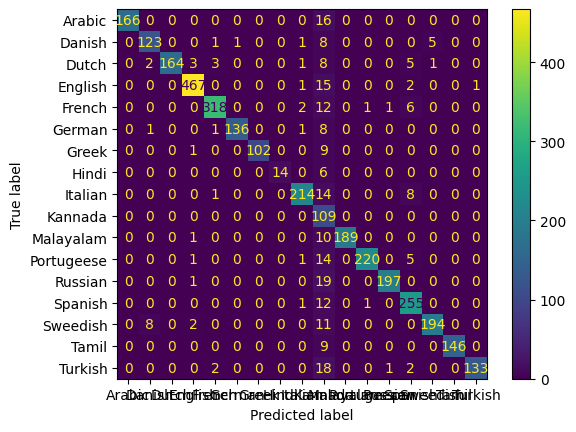

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [ ]:
X_train_prediction = classifier.predict(X_train)
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the training data :  0.9982671480144404
Accuracy score of the test data :  0.9223329425556858
